In [1]:

# need notebook backend for interaction
# %matplotlib notebook
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

from specutils import Spectrum1D
from glob import glob
import os
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

import pykosmos as pk

In [2]:
pk.__version__

'0.3.8.1'

In [3]:
bias_files = glob('bias*.fits')
bias = pk.biascombine(bias_files)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


/Users/james/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


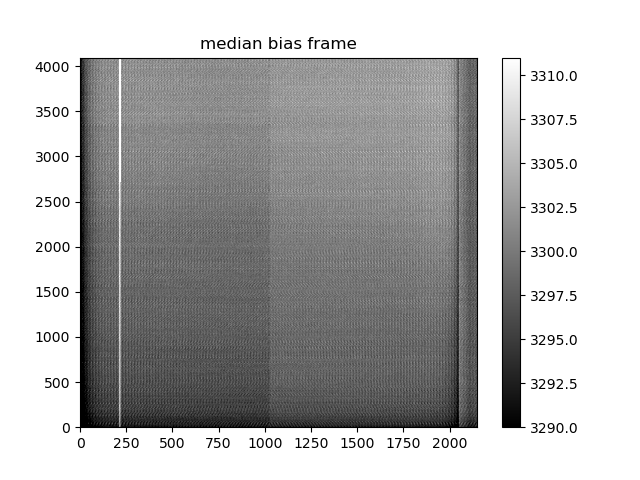

In [4]:
plt.figure()
plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title('median bias frame')
plt.clim(np.percentile(bias, (5, 98)))
cb = plt.colorbar()

In [5]:
# blue reduction first
flat_files = ['flat.0041.fits', 'flat.0042.fits', 'flat.0043.fits']
arc_files = ['Ne-int.0057.fits']
std_file = ['Feige66.0058.fits']

data_files = ['Gaia19asz.0050.fits', 'Gaia19asz.0051.fits', 'Gaia19asz.0052.fits']

tmpl = pk.loadarctemplate('NeBlue1.18-ctr.spec')
# std: /Users/james/anaconda3/lib/python3.11/site-packages/pykosmos/resources/onedstds/spec50cal/feige66.dat

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/james/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/james/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


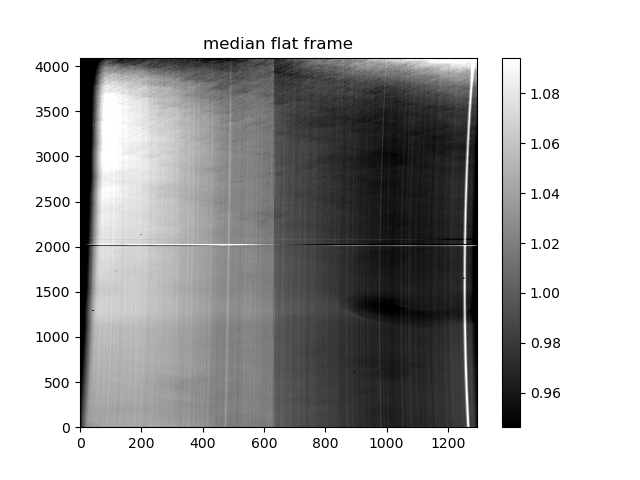

In [6]:
flat, ilum = pk.flatcombine(flat_files, bias=bias, trim=False, Saxis=1)

plt.figure()
plt.imshow(flat, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title('median flat frame')
plt.clim(np.percentile(flat, (5, 98)))
cb = plt.colorbar()

In [7]:
app = 7
# standard star
cal_img = pk.proc(std_file[0], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)

cal_trace = pk.trace(cal_img, nbins=15, Waxis=0, window=None, display=False)

cal_ex, cal_sky = pk.BoxcarExtract(cal_img, cal_trace, display=False, return_sky=True, bkgd_sub=False,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

# plt.figure()
# plt.imshow(cal_img, origin='lower', aspect='auto', cmap=plt.cm.gray)
# plt.title('cal_img')
# plt.clim(np.percentile(cal_img, (5, 98)))
# cb = plt.colorbar()

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/3177830832.py:5: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  cal_trace = pk.trace(cal_img, nbins=15, Waxis=0, window=None, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/3177830832.py:7: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  cal_ex, cal_sky = pk.BoxcarExtract(cal_img, cal_trace, display=False, return_sky=True, bkgd_sub=False,


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:6: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  sci_trace1 = pk.trace(sci_img1, nbins=8, Waxis=0, window=25, guess = 556, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:7: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  sci_trace2 = pk.trace(sci_img2, nbins=8, Waxis=0, window=25, guess = 556, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:

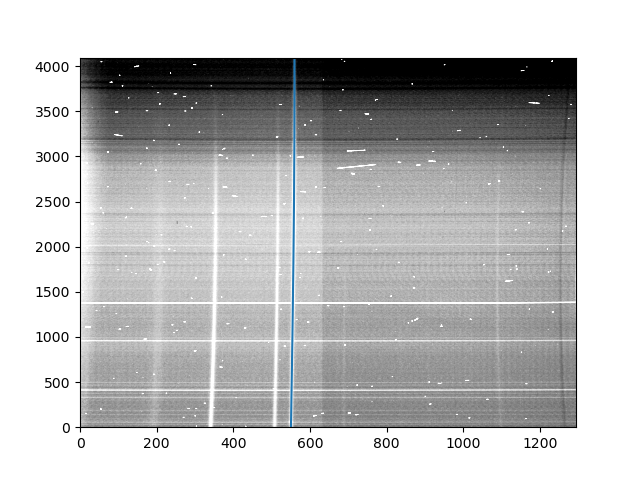

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:12: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex1, sci_sky1 = pk.BoxcarExtract(sci_img1, sci_trace1, display=False, return_sky=True, bkgd_sub=True,
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:14: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex2, sci_sky2 = pk.BoxcarExtract(sci_img2, sci_trace2, display=False, return_sky=True, bkgd_sub=True,
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/379477135.py:16: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex3, sci_sky3 = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=True, bkgd_sub=True,


In [8]:
# blue science spectrum
sci_img1 = pk.proc(data_files[0], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)
sci_img2 = pk.proc(data_files[1], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)
sci_img3 = pk.proc(data_files[2], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)

sci_trace1 = pk.trace(sci_img1, nbins=8, Waxis=0, window=25, guess = 556, display=False)
sci_trace2 = pk.trace(sci_img2, nbins=8, Waxis=0, window=25, guess = 556, display=False)
sci_trace3 = pk.trace(sci_img3, nbins=8, Waxis=0, window=25, guess = 556, display=True)
# plt.xlim(530,580)
# plt.plot(cal_trace,np.arange(len(cal_trace)))

sci_ex1, sci_sky1 = pk.BoxcarExtract(sci_img1, sci_trace1, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)
sci_ex2, sci_sky2 = pk.BoxcarExtract(sci_img2, sci_trace2, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)
sci_ex3, sci_sky3 = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

# cal_spectrum = Spectrum1D.subtract(cal_ex, cal_sky, compare_wcs=None)
# sci_spectrum = Spectrum1D.subtract(sci_ex, sci_sky, compare_wcs=None)

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/3450422709.py:1: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  sci_trace3 = pk.trace(sci_img3, nbins=8, Waxis=0, window=25, guess = 556, display=True)


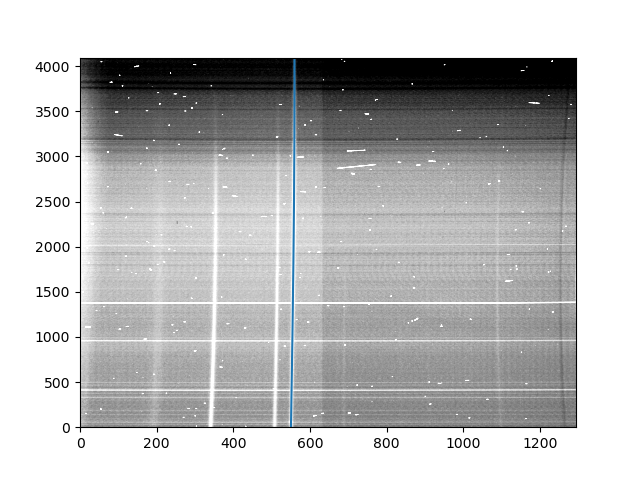

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/3450422709.py:3: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex3b,sci_sky3b = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=True, bkgd_sub=False,


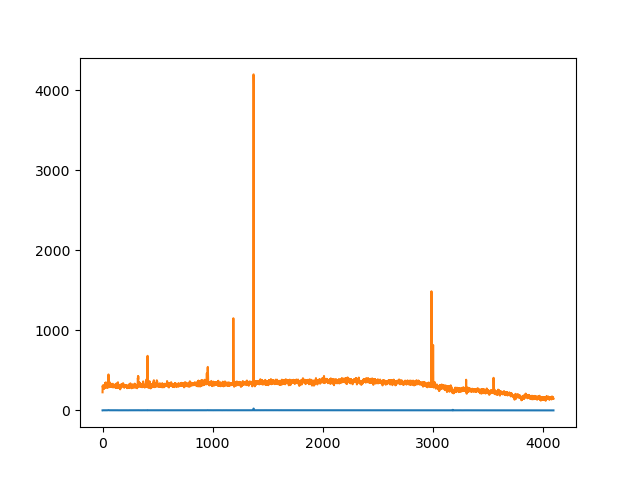

In [9]:
sci_trace3 = pk.trace(sci_img3, nbins=8, Waxis=0, window=25, guess = 556, display=True)

sci_ex3b,sci_sky3b = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=True, bkgd_sub=False,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

plt.plot(sci_trace3-app,np.arange(len(sci_trace3)),c='C0')
plt.plot(sci_trace3+app,np.arange(len(sci_trace3)),c='C0')

plt.plot(sci_trace3-10,np.arange(len(sci_trace3)),c='r')
plt.plot(sci_trace3-10-app,np.arange(len(sci_trace3)),c='r')
plt.plot(sci_trace3+10,np.arange(len(sci_trace3)),c='r')
plt.plot(sci_trace3+10+app,np.arange(len(sci_trace3)),c='r')
plt.xlim(530,580)

plt.figure()
plt.plot(sci_ex3b.flux)
plt.plot(sci_sky3b.flux)

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/547152344.py:1: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex3yes = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=False, bkgd_sub=True,
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/547152344.py:3: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex3no = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=False, bkgd_sub=False,


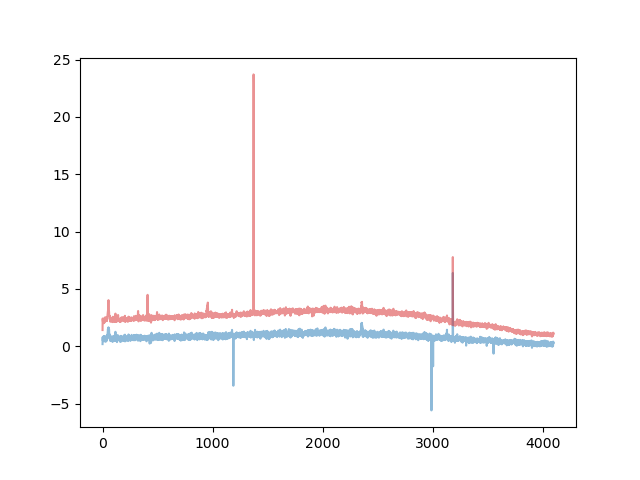

In [10]:
sci_ex3yes = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=False, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)
sci_ex3no = pk.BoxcarExtract(sci_img3, sci_trace3, display=False, return_sky=False, bkgd_sub=False,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

plt.figure()
plt.plot(sci_ex3yes.flux, c='C0', alpha=0.5)
plt.plot(sci_ex3no.flux, c='C3', alpha=0.5)

In [11]:
# plt.figure()
# plt.plot(np.nansum(sci_img3[:,547:559].data,axis=1))
# plt.plot(np.nansum(sci_img3[:,567:579].data,axis=1))
# plt.plot(np.nansum(sci_img3[:,527:539].data,axis=1))

# plt.figure()
# plt.plot(sci_img1.data.data[2000,:],c='b',alpha=0.5)
# plt.plot(sci_img2.data.data[2000,:],c='b',alpha=0.5)
# plt.plot(sci_img3.data.data[2000,:],c='b',alpha=0.5)
# plt.plot(sci_img4.data.data[2000,:],c='r',alpha=0.5)
# plt.plot(sci_img5.data.data[2000,:],c='r',alpha=0.5)
# plt.plot(sci_img6.data.data[2000,:],c='r',alpha=0.5)


In [12]:
##### cal_fit = pk.fit_wavelength(cal_spectrum, np.arange(tmpl.spectral_axis.value.size), 
#                             tmpl.spectral_axis, mode='interp', display=False)


In [13]:
arc_img = pk.proc(arc_files[0], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)

arc_sciex = pk.BoxcarExtract(arc_img, sci_trace1, display=False, return_sky=False,bkgd_sub=False,
                                       apwidth=4, skysep=15, skywidth=4, Waxis=0)
arc_calex = pk.BoxcarExtract(arc_img, cal_trace, display=False, return_sky=False,bkgd_sub=False,
                                       apwidth=4, skysep=15, skywidth=4, Waxis=0)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/375397813.py:3: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  arc_sciex = pk.BoxcarExtract(arc_img, sci_trace1, display=False, return_sky=False,bkgd_sub=False,
/Users/james/anaconda3/lib/python3.11/site-packages/pykosmos/apextract.py:282: RuntimeWarning: invalid value encountered in sqrt
  fluxerr = np.sqrt(extr.spectrum.flux.value + (N_A + N_A**2. / N_B) * (sigB**2.))
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/375397813.py:5: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  arc_calex = pk.BoxcarExtract(arc_img, cal_trace, display=False, return_sky=False,bkgd_sub=False,


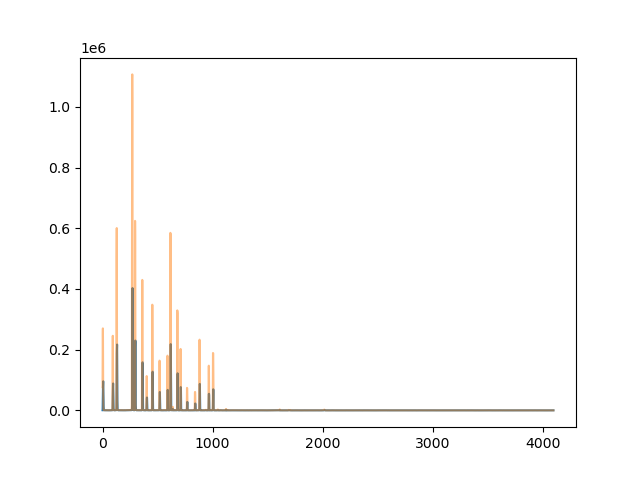

In [14]:
plt.figure()
plt.plot(arc_sciex.flux)
plt.plot(tmpl.flux, alpha=0.5)

cal_fit = pk.fit_wavelength(cal_ex, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit1 = pk.fit_wavelength(sci_ex1, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit2 = pk.fit_wavelength(sci_ex2, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit3 = pk.fit_wavelength(sci_ex3, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)

# template wavelength is VERY close... good enough for now!

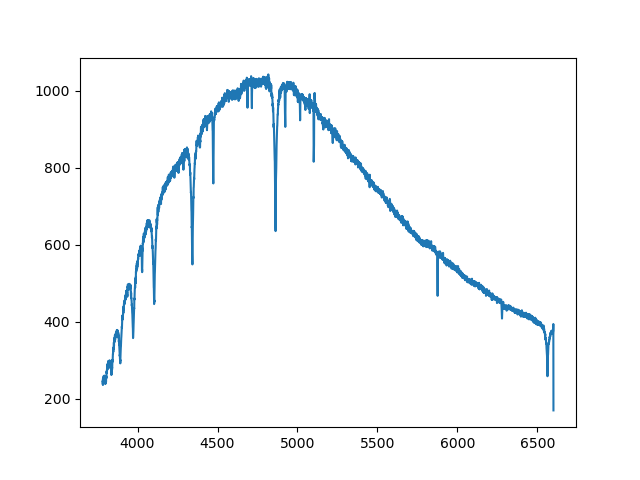

In [15]:
plt.figure()
plt.plot(cal_fit.wavelength, cal_fit.flux)
# plt.plot(tmpl.wavelength, sci_ex.flux)

In [16]:
Xfile = pk.obs_extinction('apoextinct.dat')

ZD = cal_img.header['ZD'] / 180.0 * np.pi
cal_airmass = 1.0/np.cos(ZD)
cal_fitX = pk.airmass_cor(cal_fit, cal_airmass, Xfile)

ZD = sci_img1.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit1X = pk.airmass_cor(sci_fit1, airmass, Xfile)

ZD = sci_img2.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit2X = pk.airmass_cor(sci_fit2, airmass, Xfile)

ZD = sci_img3.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit3X = pk.airmass_cor(sci_fit3, airmass, Xfile)

In [17]:
standardstar = pk.onedstd('spec50cal/feige66.dat')
sensfunc = pk.standard_sensfunc(cal_fitX, standardstar, mode='poly', 
                                polydeg=7, display=False)

sensfunc_blue = sensfunc
cal_blue = pk.apply_sensfunc(cal_fitX, sensfunc)

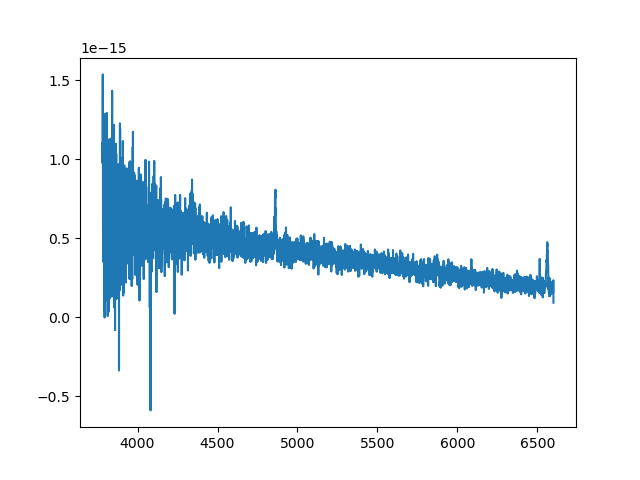

In [18]:
final1 = pk.apply_sensfunc(sci_fit1X, sensfunc)
final2 = pk.apply_sensfunc(sci_fit2X, sensfunc)
final3 = pk.apply_sensfunc(sci_fit3X, sensfunc)

plt.figure()
# plt.plot(final1.wavelength, final1.flux, alpha=0.5, c='k')
# plt.plot(final2.wavelength, final2.flux, alpha=0.5, c='k')
# plt.plot(final3.wavelength, final3.flux, alpha=0.5, c='k')

plt.plot(final1.wavelength, np.median(np.array([final1.flux, final2.flux, final3.flux]), axis=0))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/james/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/139727215.py:16: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  cal_trace = pk.trace(cal_img, nbins=15, Waxis=0, window=None, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/139727215.py:18: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  cal_ex, cal_sky = pk.BoxcarExtract(cal_img, cal_trace, display=False, return_sky=True, bkgd_sub=True,
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS ke

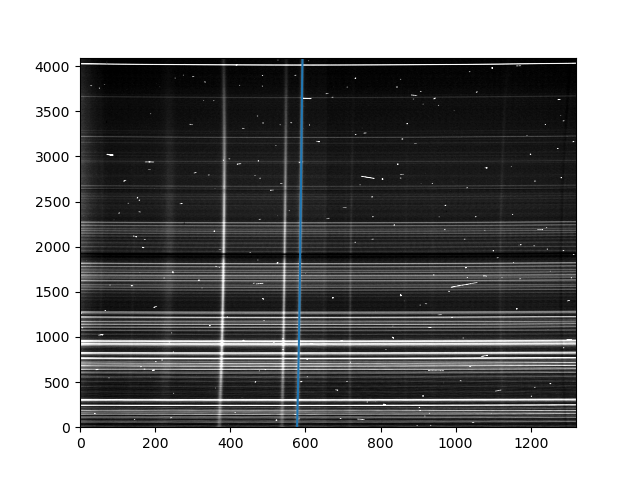

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/139727215.py:26: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  sci_trace5 = pk.trace(sci_img5, nbins=8, Waxis=0, window=25, guess = 587, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/139727215.py:27: DeprecationWarning: PyKOSMOS trace is now a wrapper for functions within specreduce.tracing, and is kept for backwards compatibility. More features are available from specreduce.tracing.
  sci_trace6 = pk.trace(sci_img6, nbins=8, Waxis=0, window=25, guess = 587, display=False)
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_56404/139727215.py:29: DeprecationWarning: PyKOSMOS BoxcarExtract is now a wrapper for functions within specreduce.extract.
  sci_ex4, sci_sky4 = pk.BoxcarExtract(sci_img4, sci_trace4, display=False, return_sky=True, bkgd

In [19]:
app = 7

# red spectra
flat_files = ['flat.0045.fits', 'flat.0046.fits', 'flat.0047.fits']
arc_files = ['Ne-int.0061.fits']
std_file = ['Feige66.0060.fits']

data_files = ['Gaia19asz.0053.fits', 'Gaia19asz.0054.fits', 'Gaia19asz.0055.fits']

tmpl = pk.loadarctemplate('NeRed1.18-ctr.spec')

flat, ilum = pk.flatcombine(flat_files, bias=bias, trim=False, Saxis=1)

cal_img = pk.proc(std_file[0], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)

cal_trace = pk.trace(cal_img, nbins=15, Waxis=0, window=None, display=False)

cal_ex, cal_sky = pk.BoxcarExtract(cal_img, cal_trace, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

sci_img4 = pk.proc(data_files[0], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)
sci_img5 = pk.proc(data_files[1], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)
sci_img6 = pk.proc(data_files[2], bias=bias, flat=flat, trim=False, Saxis=1, ilum=ilum)

sci_trace4 = pk.trace(sci_img4, nbins=8, Waxis=0, window=25, guess = 587, display=True)
sci_trace5 = pk.trace(sci_img5, nbins=8, Waxis=0, window=25, guess = 587, display=False)
sci_trace6 = pk.trace(sci_img6, nbins=8, Waxis=0, window=25, guess = 587, display=False)

sci_ex4, sci_sky4 = pk.BoxcarExtract(sci_img4, sci_trace4, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)
sci_ex5, sci_sky5 = pk.BoxcarExtract(sci_img5, sci_trace5, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)
sci_ex6, sci_sky6 = pk.BoxcarExtract(sci_img6, sci_trace6, display=False, return_sky=True, bkgd_sub=True,
                                       apwidth=app, skysep=10, skywidth=app, Waxis=0)

plt.plot(sci_trace4-app,np.arange(len(sci_trace4)),c='C0')
plt.plot(sci_trace4+app,np.arange(len(sci_trace4)),c='C0')

plt.plot(sci_trace4-10,np.arange(len(sci_trace4)),c='r')
plt.plot(sci_trace4-10-app,np.arange(len(sci_trace4)),c='r')
plt.plot(sci_trace4+10,np.arange(len(sci_trace4)),c='r')
plt.plot(sci_trace4+10+app,np.arange(len(sci_trace4)),c='r')
plt.xlim(550,610)


cal_fit = pk.fit_wavelength(cal_ex, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit4 = pk.fit_wavelength(sci_ex4, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit5 = pk.fit_wavelength(sci_ex5, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)
sci_fit6 = pk.fit_wavelength(sci_ex6, np.arange(tmpl.spectral_axis.value.size), 
                            tmpl.spectral_axis, mode='interp', display=False)

ZD = cal_img.header['ZD'] / 180.0 * np.pi
cal_airmass = 1.0/np.cos(ZD)
cal_fitX = pk.airmass_cor(cal_fit, cal_airmass, Xfile)

ZD = sci_img4.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit4X = pk.airmass_cor(sci_fit4, airmass, Xfile)

ZD = sci_img5.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit5X = pk.airmass_cor(sci_fit5, airmass, Xfile)

ZD = sci_img6.header['ZD'] / 180.0 * np.pi
airmass = 1.0/np.cos(ZD)
sci_fit6X = pk.airmass_cor(sci_fit6, airmass, Xfile)

sensfunc = pk.standard_sensfunc(cal_fitX, standardstar, mode='poly', 
                                polydeg=7, display=False)

sensfunc_red = sensfunc
cal_red = pk.apply_sensfunc(cal_fitX, sensfunc)

final4 = pk.apply_sensfunc(sci_fit4X, sensfunc)
final5 = pk.apply_sensfunc(sci_fit5X, sensfunc)
final6 = pk.apply_sensfunc(sci_fit6X, sensfunc)


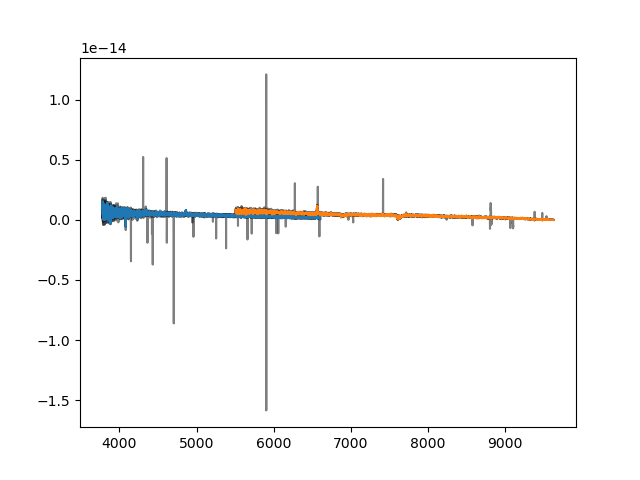

In [20]:
plt.figure()

plt.plot(final1.wavelength, final1.flux, alpha=0.5, c='k')
plt.plot(final2.wavelength, final2.flux, alpha=0.5, c='k')
plt.plot(final3.wavelength, final3.flux, alpha=0.5, c='k')

plt.plot(final4.wavelength, final4.flux, alpha=0.5, c='k')
plt.plot(final5.wavelength, final5.flux, alpha=0.5, c='k')
plt.plot(final6.wavelength, final6.flux, alpha=0.5, c='k')

plt.plot(final1.wavelength, np.median(np.array([final1.flux, final2.flux, final3.flux]), axis=0))
plt.plot(final4.wavelength, np.median(np.array([final4.flux, final5.flux, final6.flux]), axis=0))

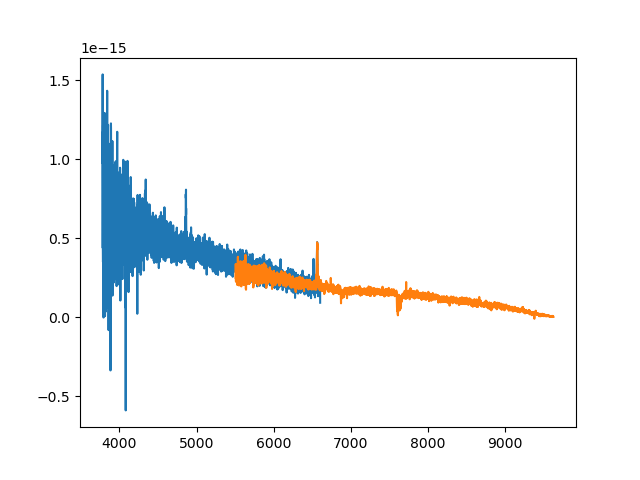

In [28]:
plt.figure()
plt.plot(final1.wavelength, np.median(np.array([final1.flux, final2.flux, final3.flux]), axis=0))
plt.plot(final4.wavelength, np.median(np.array([final4.flux, final5.flux, final6.flux])/2.5, axis=0))

# looks like flux correction isn't perfect, doing a manual shift to align it in red
# WEIRD... super featurless 

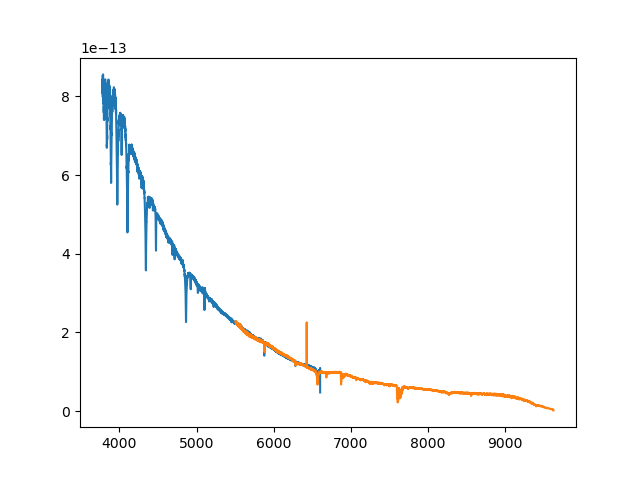

In [25]:
plt.figure()
plt.plot(cal_blue.wavelength, cal_blue.flux)
plt.plot(cal_red.wavelength, cal_red.flux)
